# Lecture 15: Convex optimization

[Convex optimization](https://en.wikipedia.org/wiki/Convex_optimization) methods are designed to find the minima of [convex functions](https://en.wikipedia.org/wiki/Convex_function). A function $f(\underline{x})$ is convex if

$$
f(\alpha \underline{x} + \beta \underline{y}) \leq \alpha f(\underline{x}) + \beta f(\underline{y})\,.
$$

A function is convex if its second derivative is always non-negative (or, in the multidimensional case, if all the eigenvalues of the matrix of second derivatives are non-negative).

While finding the minimum of a convex function can be challenging, it is simpler than minimizing an arbitrary function because any local minimum of a convex function is also a global minimum.


# Steepest descent

The simplest approach to minimizing a convex function is called the [steepest descent](https://en.wikipedia.org/wiki/Gradient_descent) method, sometimes also referred to as gradient descent. In this method, we start at some initial value of the parameters $\underline{x}_0$. We then iterate through the following steps:

1. Compute the direction of steepest descent $\underline{s}$, given by the derivative $\underline{s} = -\nabla f(\underline{x}_k)$
2. Choose a distance $t$ to step along this direction
3. Update the parameters $\underline{x}_{k+1} = \underline{x}_k + t \underline{s}$

This processs continues until the derivative $\nabla f(\underline{x})$ becomes very small, suggesting that we are close to the minimum of the function.

### Example: Steepest descent optimization of a quadratic function

Let's apply steepest descent in a simple example. For example, we can consider a quadratic function of a single variable

$$
f(x) = a x^2 + bx + c\,,
$$

with $a>0$. First, we can simply plot the function and observe where the minimum lies.

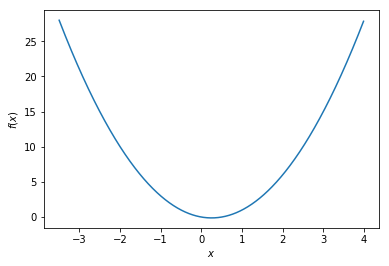

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Define the quadratic function

a =  2
b = -1
c =  0

def f(x):
    return a*x**2 + b*x + c


# Plot the function

x_values = np.arange(-3.5, 4, 0.01)
y_values = f(x_values)

sns.lineplot(x_values, y_values)
plt.xlabel('$x$')
plt.ylabel('$f(x)$');

In this simple case we can also work out the minimum analytically. Setting the derivative 

$$
\nabla f(x) = 2ax + b = 0\,,
$$

we find that the minimum lies at $-b/2a$. We know that this point is a minimum because the function is strictly convex. Above we chose $a=2$, $b=-1$, and $c=0$, so the minimum is located at $x^* = 1/4$.

Now, let's step through the steepest descent algorithm. 

### Step 1. Compute the step direction

In the code below we will compute the step direction for steepest descent. We'll start by defining a function for the derivative.

In [3]:
def df(x):
    """ Returns the derivative of the quadratic function f(x) = a x^2 + b x + c"""
    return 2*a*x + b # FILL THIS IN


# Choose the step direction

x0 = 3  # Starting value for x
x  = x0
s  = -df(x)   # FILL THIS IN
print(s)

-11


### Step 2. Choose the step length

In this case, since our problem is one-dimensional the "step direction" is very simple -- we just need to choose whether $x$ should increase or decrease, which we determined above based on the derivative.

But now that we have the direction, how far should we step? We'll talk more about choosing the step length intelligently during the next lecture. For the moment, though, let's simply choose a small $t = 0.1$ for our step size.

### Step 3. Update the parameters

The last step in the steepest descent algorithm is to update the parameters. We'll also check for convergence to the minimum by looking at the size of the derivative,

$$
\left|\nabla f(x)\right| < \epsilon\,,
$$

for some suitably small value of $\epsilon$.

**Exercise**: Fill in the code below to find the minimum of $f(x)$ by steepest descent. We'll start at $x_0=3$.

In [4]:
epsilon  = 0.001  # Stopping condition -- end when |df/dx| < epsilon 
max_iter = 100    # Maximum number of iterations
it       = 0      # Current iteration

x0   = 3      # Starting value of parameter
x    = x0     # Current value of the parameter
dfdx = df(x0) # Starting value of the derivative df/dx

# Report status
print('iter\tx\tdf/dx')

# Now loop through the steepest descent algorithm

while np.fabs(dfdx)>=epsilon and it<max_iter:
    
    # Report status
    print('%d\t%.4f\t%.4f' % (it, x, dfdx))
    
    # Choose the step direction
    s = -df(x) # FILL THIS IN
    
    # Choose how far to step in that direction
    t  = 0.1
    
    # Update the parameters
    x += t*s # FILL THIS IN
    
    # Update the derivative
    dfdx = df(x) # FILL THIS IN
    
    # Update the iteration counter
    it += 1
    
# Report the minimum
print('\nFound the minimum near x* = %lf, true minimum is 0.25' % x)

iter	x	df/dx
0	3.0000	11.0000
1	1.9000	6.6000
2	1.2400	3.9600
3	0.8440	2.3760
4	0.6064	1.4256
5	0.4638	0.8554
6	0.3783	0.5132
7	0.3270	0.3079
8	0.2962	0.1848
9	0.2777	0.1109
10	0.2666	0.0665
11	0.2600	0.0399
12	0.2560	0.0239
13	0.2536	0.0144
14	0.2522	0.0086
15	0.2513	0.0052
16	0.2508	0.0031
17	0.2505	0.0019
18	0.2503	0.0011

Found the minimum near x* = 0.250168, true minimum is 0.25


### Possible issues

What happens if we don't choose the step size well? Let's copy the code from above and retry it with $t=1$.

In [8]:
epsilon  = 0.001  # Stopping condition -- end when |df/dx| < epsilon 
max_iter = 100    # Maximum number of iterations
it       = 0      # Current iteration

x0   = 3      # Starting value of parameter
x    = x0     # Current value of the parameter
dfdx = df(x0) # Starting value of the derivative df/dx

# Report status
print('iter\tx\tdf/dx')

# Now loop through the steepest descent algorithm

while np.fabs(dfdx)>=epsilon and it<max_iter:
    
    # Report status
    print('%d\t%.4f\t%.4f' % (it, x, dfdx))
    
    # Choose the step direction
    s = -df(x) # FILL THIS IN
    
    # Choose how far to step in that direction
    t  = 0.5
    
    # Update the parameters
    x += t*s # FILL THIS IN
    
    # Update the derivative
    dfdx = df(x) # FILL THIS IN
    
    # Update the iteration counter
    it += 1
    
# Report the minimum
print('\nFound the minimum near x* = %lf, true minimum is 0.25' % x)

iter	x	df/dx
0	3.0000	11.0000
1	-2.5000	-11.0000
2	3.0000	11.0000
3	-2.5000	-11.0000
4	3.0000	11.0000
5	-2.5000	-11.0000
6	3.0000	11.0000
7	-2.5000	-11.0000
8	3.0000	11.0000
9	-2.5000	-11.0000
10	3.0000	11.0000
11	-2.5000	-11.0000
12	3.0000	11.0000
13	-2.5000	-11.0000
14	3.0000	11.0000
15	-2.5000	-11.0000
16	3.0000	11.0000
17	-2.5000	-11.0000
18	3.0000	11.0000
19	-2.5000	-11.0000
20	3.0000	11.0000
21	-2.5000	-11.0000
22	3.0000	11.0000
23	-2.5000	-11.0000
24	3.0000	11.0000
25	-2.5000	-11.0000
26	3.0000	11.0000
27	-2.5000	-11.0000
28	3.0000	11.0000
29	-2.5000	-11.0000
30	3.0000	11.0000
31	-2.5000	-11.0000
32	3.0000	11.0000
33	-2.5000	-11.0000
34	3.0000	11.0000
35	-2.5000	-11.0000
36	3.0000	11.0000
37	-2.5000	-11.0000
38	3.0000	11.0000
39	-2.5000	-11.0000
40	3.0000	11.0000
41	-2.5000	-11.0000
42	3.0000	11.0000
43	-2.5000	-11.0000
44	3.0000	11.0000
45	-2.5000	-11.0000
46	3.0000	11.0000
47	-2.5000	-11.0000
48	3.0000	11.0000
49	-2.5000	-11.0000
50	3.0000	11.0000
51	-2.5000	-11.0000
52	3.0000

**Oh no!** These kind of traps are surprisingly easy to fall into in optimization. Next time we'll talk about methods that can avoid them.